In [1]:
import pandas as pd

In [37]:
pollution = pd.read_csv('~/Desktop/pollution_us_2000_2016.csv', index_col='Unnamed: 0')

/Users/mollymcnamara/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [38]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746661 entries, 0 to 24603
Data columns (total 28 columns):
State Code           int64
County Code          int64
Site Num             int64
Address              object
State                object
County               object
City                 object
Date Local           object
NO2 Units            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     int64
NO2 AQI              int64
O3 Units             object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      int64
O3 AQI               int64
SO2 Units            object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     int64
SO2 AQI              float64
CO Units             object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      int64
CO AQI               float64
dtypes: float64(10), int64(9), object(9)
memory usage: 386.5+ MB


In [39]:
pollution.head()


,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [40]:
#Remove unnecessary columns to make this dataset easier to approach
pollution = pollution.drop(['State Code','County Code','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
pollution.head()

,Site Num,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,3002,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,...,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,3002,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,...,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,3002,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,...,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,3002,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,...,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,3002,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,...,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [41]:
#It appears that some of the sites have duplicate/multiple rows for each date.  
pollution = pollution.groupby(['Site Num','Date Local', 'State', 'County', 'City']).mean().reset_index()
pollution.head()

,Site Num,Date Local,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,1,2000-01-01,California,San Diego,Chula Vista,10.913043,20.0,0.0,19.0,0.031625,...,9.0,36.0,2.064907,2.65,6.0,4.0,0.603382,0.95,8.0,9.0
1,1,2000-01-02,California,San Diego,Chula Vista,10.869565,35.0,18.0,33.0,0.026833,...,9.0,34.0,1.748136,2.00,1.0,3.0,0.560145,1.15,20.5,10.0
2,1,2000-01-03,California,San Diego,Chula Vista,27.782609,45.0,17.0,42.0,0.011333,...,9.0,19.0,2.172671,3.00,14.0,4.0,1.174003,2.30,21.0,20.0
3,1,2000-01-04,California,San Diego,Chula Vista,33.869565,58.0,17.0,55.0,0.009417,...,8.0,18.0,2.992546,4.65,16.5,7.0,1.249003,2.25,21.0,22.0
4,1,2000-01-05,California,San Diego,Chula Vista,34.181818,50.0,18.0,47.0,0.011875,...,10.0,23.0,3.132575,3.80,9.0,6.0,1.588258,3.05,15.0,24.0


In [49]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412856 entries, 0 to 412855
Data columns (total 21 columns):
Site Num             412856 non-null int64
Date Local           412856 non-null object
State                412856 non-null object
County               412856 non-null object
City                 412856 non-null object
NO2 Mean             412856 non-null float64
NO2 1st Max Value    412856 non-null float64
NO2 1st Max Hour     412856 non-null float64
NO2 AQI              412856 non-null float64
O3 Mean              412856 non-null float64
O3 1st Max Value     412856 non-null float64
O3 1st Max Hour      412856 non-null float64
O3 AQI               412856 non-null float64
SO2 Mean             412856 non-null float64
SO2 1st Max Value    412856 non-null float64
SO2 1st Max Hour     412856 non-null float64
SO2 AQI              412856 non-null float64
CO Mean              412856 non-null float64
CO 1st Max Value     412856 non-null float64
CO 1st Max Hour      412856 non-null flo

In [42]:
pollution.tail()

,Site Num,Date Local,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
412851,9997,2016-03-22,Arizona,Maricopa,Phoenix,9.383333,31.4,7.0,29.0,0.037792,...,10.0,44.0,0.068750,0.60,7.5,0.0,0.303562,0.5880,7.0,5.0
412852,9997,2016-03-23,Arizona,Maricopa,Phoenix,7.945455,30.2,23.0,28.0,0.029042,...,8.0,39.0,0.002174,0.05,12.0,0.0,0.262869,0.4700,23.0,5.0
412853,9997,2016-03-24,Arizona,Maricopa,Phoenix,20.195833,41.0,21.0,39.0,0.022625,...,11.0,45.0,0.210417,0.85,10.0,1.0,0.491875,0.8155,13.5,7.0
412854,9997,2016-03-25,Arizona,Maricopa,Phoenix,17.308333,40.2,22.0,38.0,0.027125,...,11.0,47.0,0.435416,0.90,11.5,1.0,0.462188,0.8600,12.0,9.0
412855,9997,2016-03-26,Arizona,Maricopa,Phoenix,14.579167,35.2,0.0,33.0,0.042053,...,11.0,67.0,0.618750,1.15,1.0,1.0,0.443584,0.8460,2.0,9.0


In [43]:
pollution.describe()

,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412650.000000
mean,1110.318559,12.943202,25.557748,11.731099,24.038367,0.026092,0.039184,10.175389,35.964773,1.903953,4.564842,9.639881,7.245721,0.369380,0.626315,7.887068,6.042532
std,1955.594515,9.593288,16.118488,7.863331,15.274345,0.011415,0.015316,3.996333,19.623752,2.804391,7.503252,6.336021,12.034155,0.316870,0.627269,6.736911,5.942352
min,1.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.725155,-1.400000,0.000000,0.000000,-0.420833,-0.400000,0.000000,0.000000
25%,9.000000,5.816667,13.000000,5.000000,12.000000,0.017792,0.029000,9.000000,25.000000,0.254167,0.800000,4.500000,1.000000,0.185688,0.250000,3.000000,2.000000
50%,69.000000,10.869565,24.000000,9.000000,23.000000,0.025875,0.038000,10.000000,33.000000,0.996875,2.000000,9.500000,3.000000,0.293478,0.450000,6.500000,5.000000
75%,1039.000000,17.916667,36.000000,20.000000,34.000000,0.033917,0.048000,11.000000,42.000000,2.390016,5.250000,13.500000,9.000000,0.466666,0.750000,11.000000,8.000000
max,9997.000000,139.541667,267.000000,23.000000,132.000000,0.095083,0.141000,23.000000,218.000000,321.612500,350.800000,23.000000,200.000000,7.151993,17.700000,23.000000,201.000000


In [55]:
pollution.isnull().any()

Site Num             False
Date Local           False
State                False
County               False
City                 False
NO2 Mean             False
NO2 1st Max Value    False
NO2 1st Max Hour     False
NO2 AQI              False
O3 Mean              False
O3 1st Max Value     False
O3 1st Max Hour      False
O3 AQI               False
SO2 Mean             False
SO2 1st Max Value    False
SO2 1st Max Hour     False
SO2 AQI              False
CO Mean              False
CO 1st Max Value     False
CO 1st Max Hour      False
CO AQI                True
dtype: bool

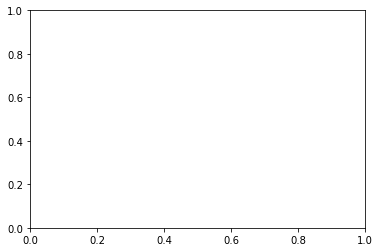

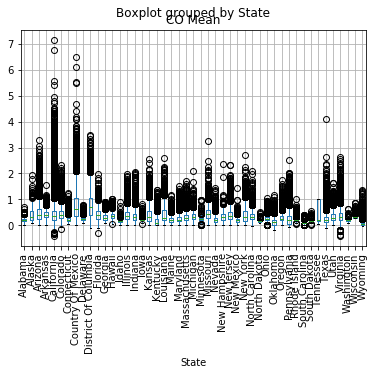

In [47]:
#Do boxplots for outliers - all the important data fields

# Import necessary modules
import matplotlib.pyplot as plt

# Create the boxplot
pollution.boxplot(column='NO2 Mean', by='State', rot=90)

# Display the plot
plt.show()
